<a href="https://colab.research.google.com/github/dhineshkumar1998/Finacial_dashboard_dhineshkumarR/blob/main/Spotify_Project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy==2.24.0

{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0C0XlULifJtAgn6ZNCW2eu'}, 'href': 'https://api.spotify.com/v1/artists/0C0XlULifJtAgn6ZNCW2eu', 'id': '0C0XlULifJtAgn6ZNCW2eu', 'name': 'The Killers', 'type': 'artist', 'uri': 'spotify:artist:0C0XlULifJtAgn6ZNCW2eu'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV', 'CW', 'DM', 'FJ

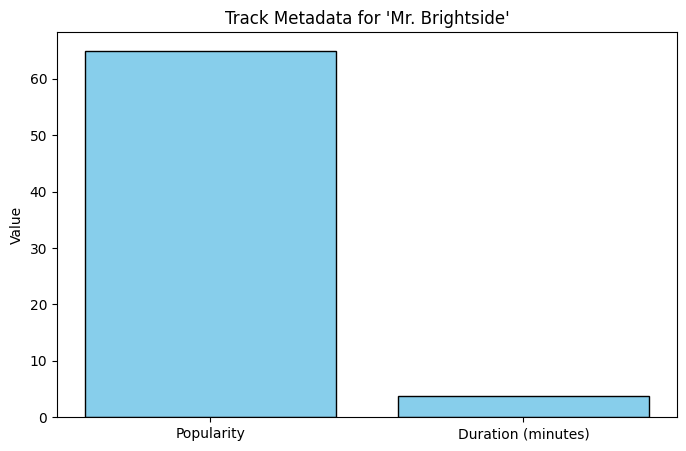

In [ ]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import re

# Set up Client Credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id='405f83091f7141cf8044a9b944244f10',  # Replace with your Client ID
    client_secret='86c983c50c964d83a2881a4de168d9f0'  # Replace with your Client Secret
))

# Full track URL (example: Shape of You by Ed Sheeran)
track_url = "https://open.spotify.com/track/3n3Ppam7vgaVa1iaRUc9Lp"

# Extract track ID directly from URL using regex
track_id = re.search(r'track/([a-zA-Z0-9]+)', track_url).group(1)

# Fetch track details
track = sp.track(track_id)
print(track)
# Extract metadata
track_data = {
    'Track Name': track['name'],
    'Artist': track['artists'][0]['name'],
    'Album': track['album']['name'],
    'Popularity': track['popularity'],
    'Duration (minutes)': track['duration_ms'] / 60000
}

# Display metadata
print(f"\nTrack Name: {track_data['Track Name']}")
print(f"Artist: {track_data['Artist']}")
print(f"Album: {track_data['Album']}")
print(f"Popularity: {track_data['Popularity']}")
print(f"Duration: {track_data['Duration (minutes)']:.2f} minutes")

# Convert metadata to DataFrame
df = pd.DataFrame([track_data])
print("\nTrack Data as DataFrame:")
print(df)

# Save metadata to CSV
df.to_csv('spotify_track_data.csv', index=False)

# Visualize track data
features = ['Popularity', 'Duration (minutes)']
values = [track_data['Popularity'], track_data['Duration (minutes)']]

plt.figure(figsize=(8, 5))
plt.bar(features, values, color='skyblue', edgecolor='black')
plt.title(f"Track Metadata for '{track_data['Track Name']}'")
plt.ylabel('Value')
plt.show()